In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data100 = np.genfromtxt("N=100", delimiter=",",skip_header=1)
data50 = np.genfromtxt("N=50", delimiter=",",skip_header=1)
data25 = np.genfromtxt("N=25", delimiter=",",skip_header=1)
data10 = np.genfromtxt("N=10", delimiter=",",skip_header=1)
data5 = np.genfromtxt("N=5", delimiter=",",skip_header=1)

In [3]:
betas = data100[:,0]
mags100 = data100[:,1]
mags50 = data50[:,1]
mags25 = data25[:,1]
mags10 = data10[:,1]
mags5 = data5[:,1]

In [4]:
betac = np.log(1+np.sqrt(2))/2

In [5]:
mags_exact = np.piecewise(betas, [betas<=betac, betas >betac], [lambda x: 0, lambda x:  (1-np.sinh(2*x)**-4)**(1/8)])

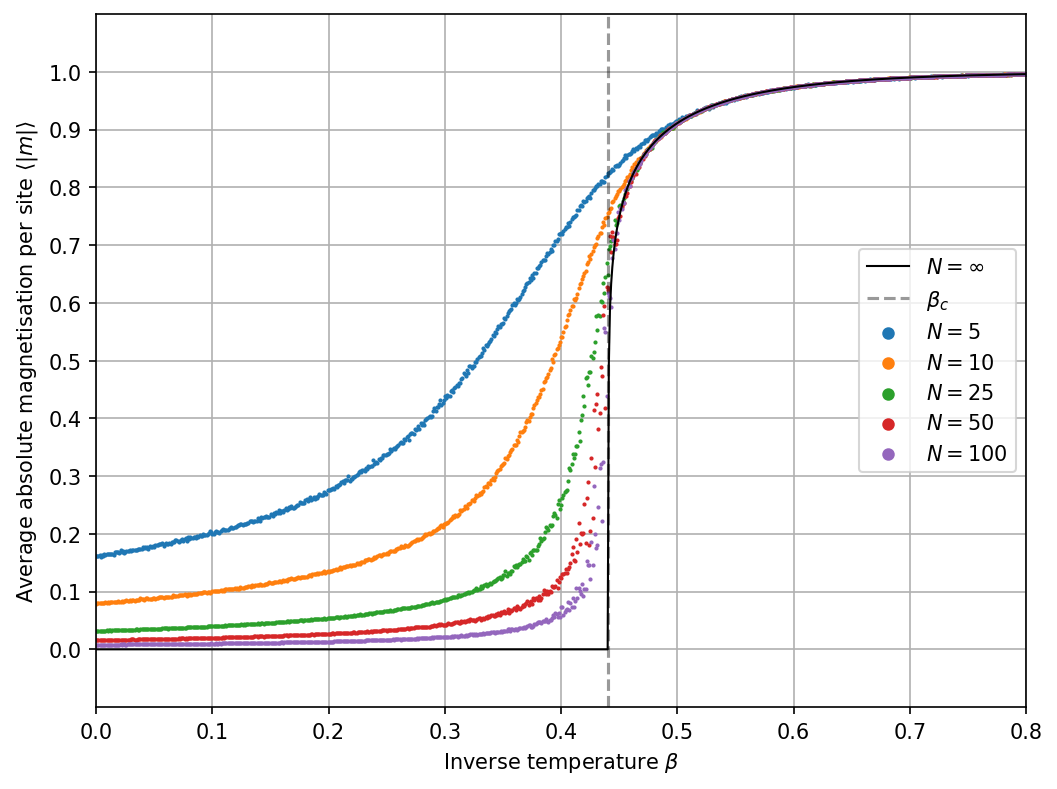

In [6]:
fig, ax = plt.subplots(figsize=(8,6),dpi=150)

for (a,b) in zip([mags5, mags10, mags25,mags50,mags100],[5,10,25,50,100]):
    labelstr ="$N={}$".format(b)
    ax.scatter(betas,a,s=1,label=labelstr,zorder=2)

ax.plot(betas,mags_exact,label="$N=\infty$",color="black",alpha=1,lw=1)
ax.axvline(0.44,label=r"$\beta_c$",color="black",ls="--",alpha=0.4)
#ax.axhline(0,color="black",alpha=0.4)
#ax.axhline(1,color="black",alpha=0.4)

ax.set_yticks([0.1*i for i in range(11)])
ax.set_xticks([0.1*i for i in range(11)])
ax.set_ylabel(r"Average absolute magnetisation per site $\langle |m| \rangle$")
ax.set_xlabel(r"Inverse temperature $\beta$")
plt.legend(markerscale=5.,loc="right")
ax.set_ylim(-0.1,1.1)
ax.set_xlim(0,0.8)
plt.grid(True)
plt.savefig("mag.png",dpi=300)